**In this notebook, we create visualizations to explore and compare hotel reviews from New York City. The key steps include:**

Data Preparation: We begin by filtering and cleaning the dataset, focusing on a selection of hotels, and handling missing data.

Visualizations:

Average Ratings: Bar charts displaying the average ratings for various hotels.
Review Counts: Bar charts showing the number of reviews per hotel.
Sentiment Distribution: A pie chart visualizing the proportion of positive and negative reviews.
Sentiment and Rating Trends Over Time: Line charts tracking the trends in sentiment and overall ratings across time.
Topic Distribution: A bar chart illustrating the frequency of different topics across all reviews.
Correlation Heatmap: A heatmap showing the correlations between different rating dimensions.
Word Clouds: Visual representations of the most common words in positive and negative reviews.
Comparative Analysis:

Hotel Comparison: Bar charts comparing average ratings and sentiment between 'New York Marriott Marquis' and its competitors.
Topic Analysis: Comparison of topic distributions between 'New York Marriott Marquis' and competing hotels.
Time Series Analysis: We analyze how the sentiment and overall ratings for 'New York Marriott Marquis' evolve over time, providing insights into trends that may indicate strengths or weaknesses.

SWOT Analysis: Based on the visualizations, a SWOT analysis is performed to identify the strengths, weaknesses, opportunities, and threats for 'New York Marriott Marquis'.

This notebook provides a comprehensive visual exploration of the dataset, highlighting key insights that can inform strategic decisions for hotel management.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting settings
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('./data/reviews.csv')

In [5]:
# Filter to our needed hotels
df_nyc =df[df['name'].isin(['Hilton Garden Inn Times Square',
    'New York Marriott Marquis',
    'Staybridge Suites Times Square - New York City',
    'InterContinental New York Times Square',
    'Renaissance New York Hotel Times Square',
    'YOTEL New York at Times Square West'
])]

In [6]:
# Remove duplicates
data_cleaned = df_nyc.drop_duplicates()

# Handle missing data
# For the purpose of this analysis, we'll drop rows with missing sentiment or rating information
data_cleaned = data_cleaned.dropna(subset=['sentiment', 'overall_rating', 'name'])

In [7]:
import matplotlib.pyplot as plt

# Group data by hotel name
grouped_data = data_cleaned.groupby('name').agg({
    'overall_rating': 'mean',
    'text': 'count',
    'sentiment': lambda x: (x == 'POSITIVE').sum()
}).rename(columns={'text': 'review_count', 'sentiment': 'positive_reviews'})

# Calculate negative reviews
grouped_data['negative_reviews'] = grouped_data['review_count'] - grouped_data['positive_reviews']



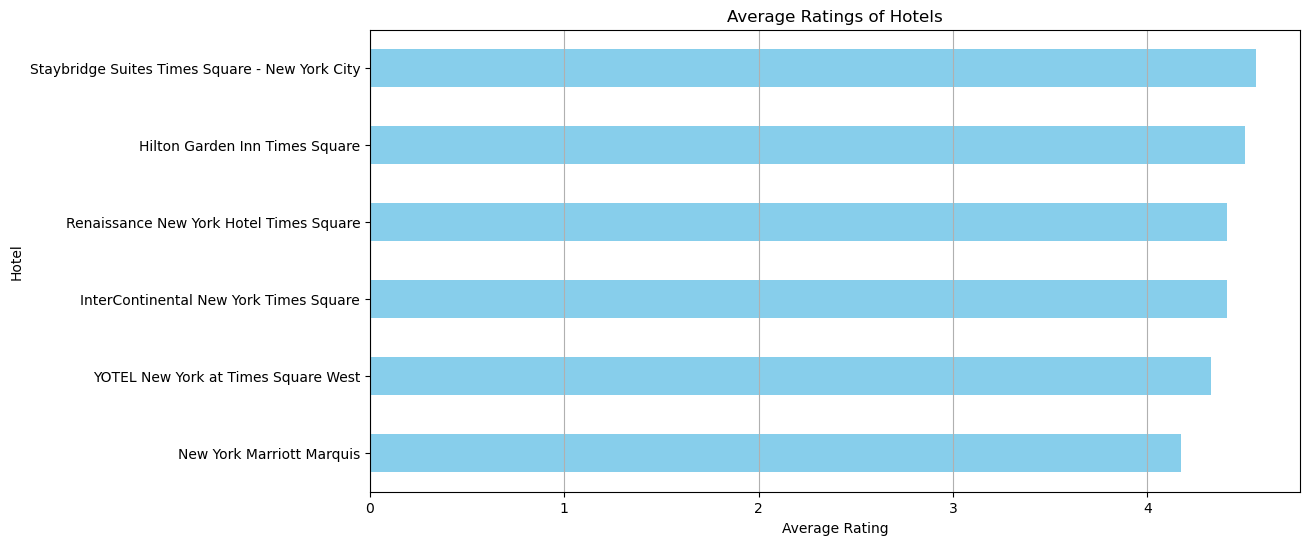

In [8]:
# Plot average ratings
plt.figure(figsize=(12, 6))
grouped_data['overall_rating'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Ratings of Hotels')
plt.xlabel('Average Rating')
plt.ylabel('Hotel')
plt.grid(axis='x')
plt.show()


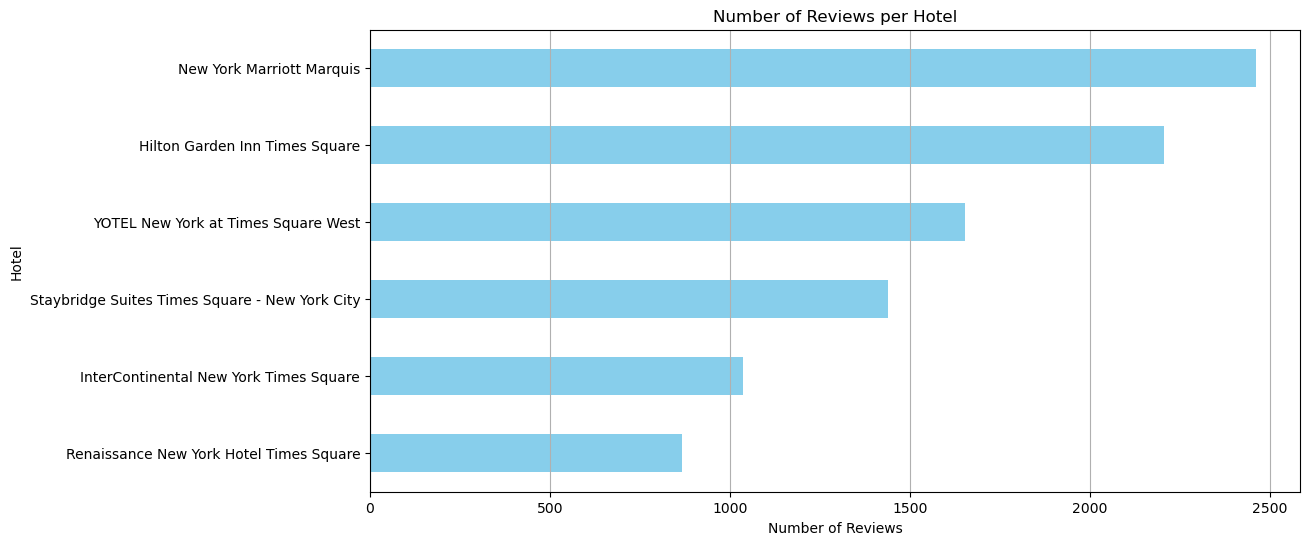

In [9]:
# Plot review counts
plt.figure(figsize=(12, 6))
grouped_data['review_count'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Number of Reviews per Hotel')
plt.xlabel('Number of Reviews')
plt.ylabel('Hotel')
plt.grid(axis='x')
plt.show()


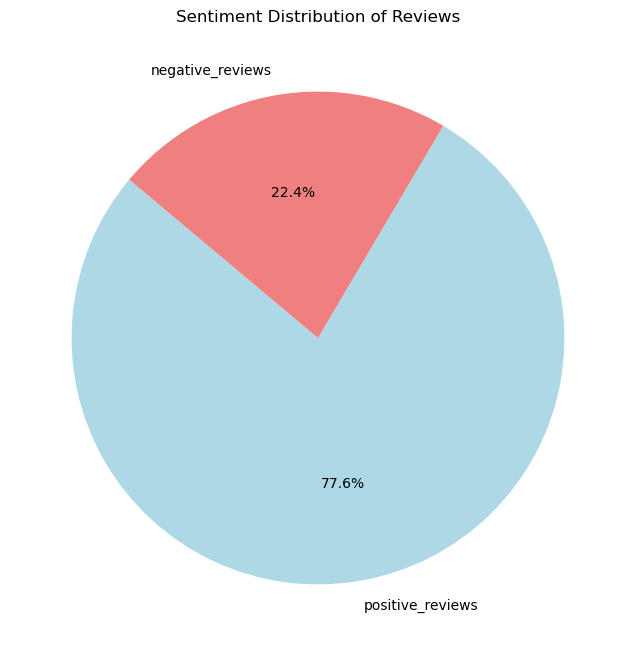

In [10]:
# Plot sentiment distribution
sentiment_data = grouped_data[['positive_reviews', 'negative_reviews']].sum()
plt.figure(figsize=(8, 8))
sentiment_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Sentiment Distribution of Reviews')
plt.ylabel('')
plt.show()

In [11]:
# Convert the date column to datetime
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])


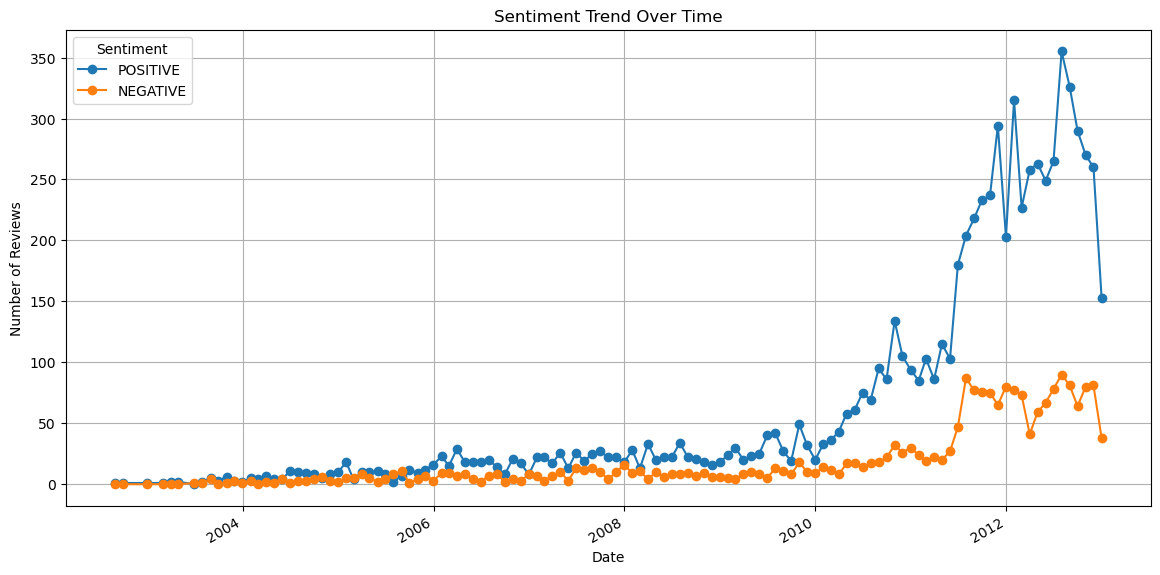

In [12]:
# Trend analysis for sentiment over time
sentiment_trend = data_cleaned.resample('ME', on='date')['sentiment'].value_counts().unstack().fillna(0)

plt.figure(figsize=(14, 7))
sentiment_trend[['POSITIVE', 'NEGATIVE']].plot(kind='line', marker='o', ax=plt.gca())
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()

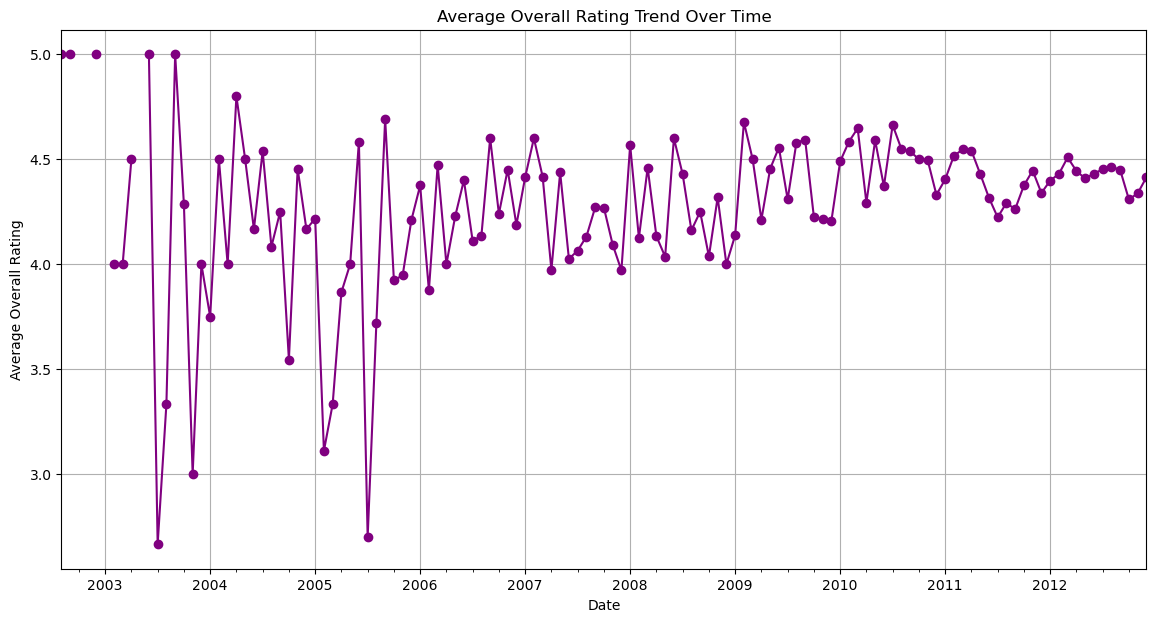

In [13]:
# Trend analysis for overall ratings over time
rating_trend = data_cleaned.resample('ME', on='date')['overall_rating'].mean()

plt.figure(figsize=(14, 7))
rating_trend.plot(kind='line', marker='o', color='purple')
plt.title('Average Overall Rating Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Overall Rating')
plt.grid(True)
plt.show()


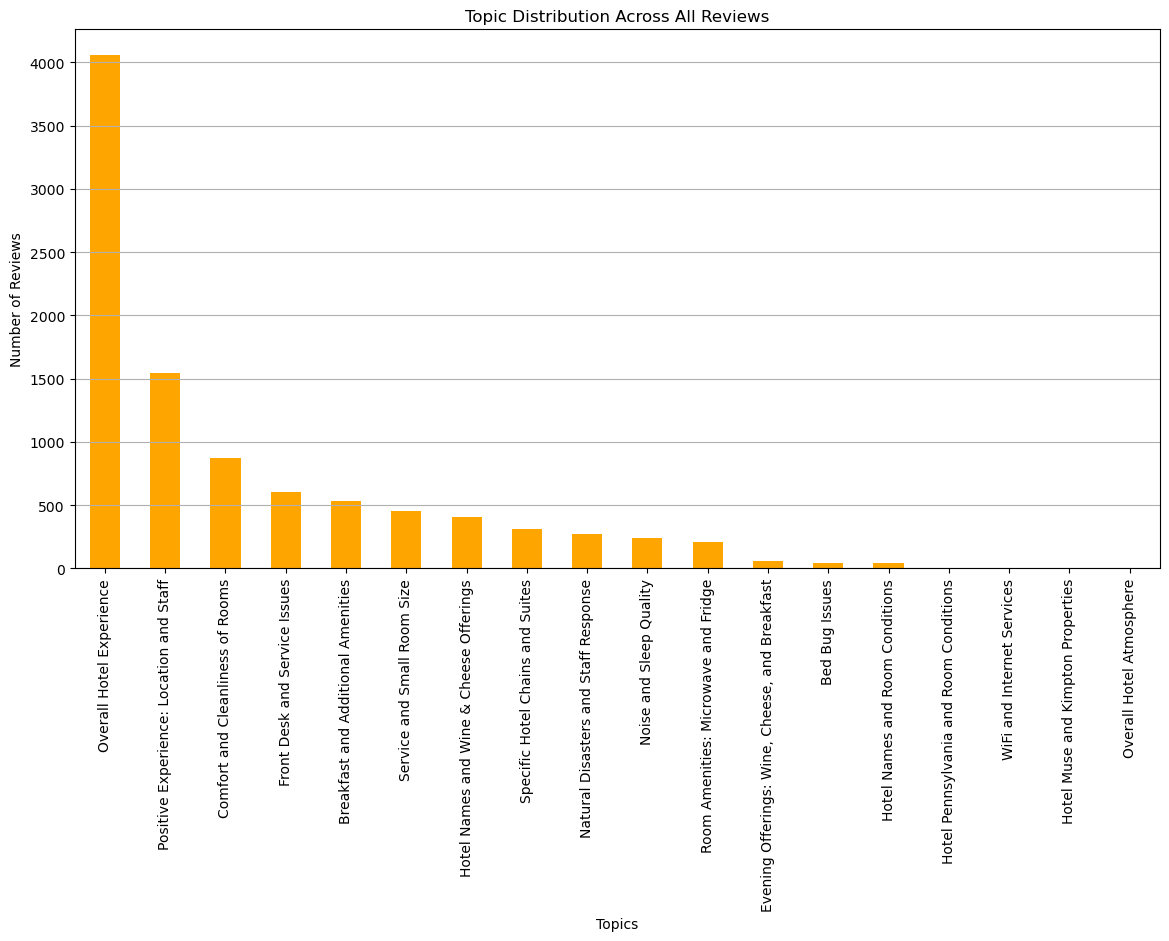

In [14]:
# Topic modeling visualization
topic_distribution = data_cleaned['label'].value_counts()

plt.figure(figsize=(14, 7))
topic_distribution.plot(kind='bar', color='orange')
plt.title('Topic Distribution Across All Reviews')
plt.xlabel('Topics')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()



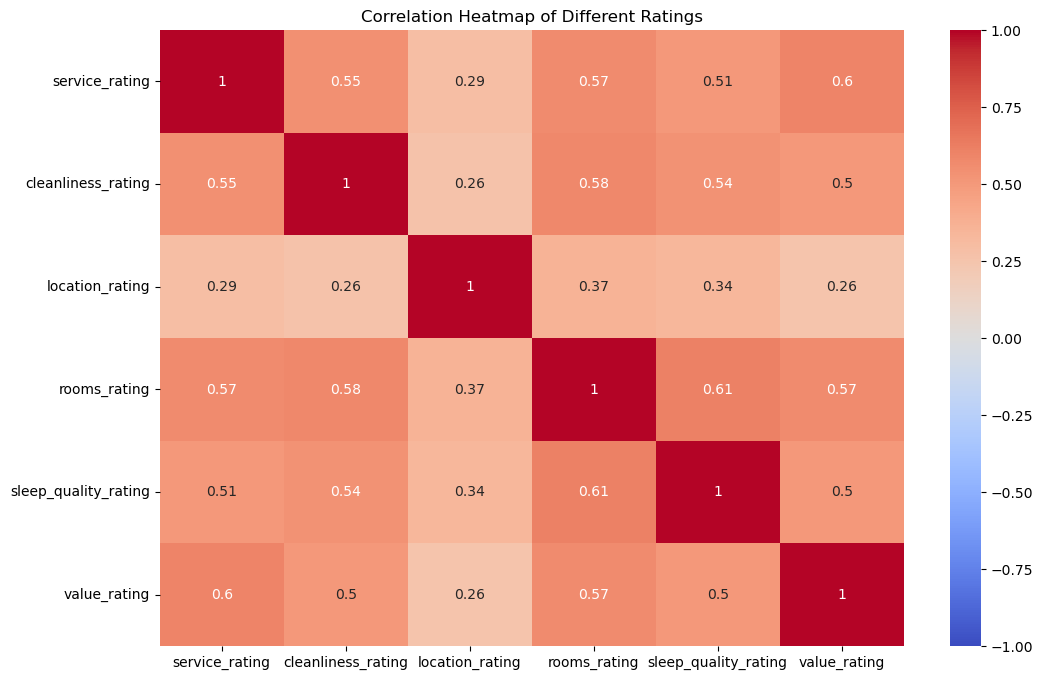

In [15]:
# Heatmap of ratings
rating_columns = ['service_rating', 'cleanliness_rating', 'location_rating', 'rooms_rating', 'sleep_quality_rating', 'value_rating']
heatmap_data = data_cleaned[rating_columns].dropna()

plt.figure(figsize=(12, 8))
correlation_matrix = heatmap_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Different Ratings')
plt.show()

from wordcloud import WordCloud

# Generate word cloud for positive reviews
positive_reviews = ' '.join(data_cleaned[data_cleaned['sentiment'] == 'POSITIVE']['processed_text'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Generate word cloud for negative reviews
negative_reviews = ' '.join(data_cleaned[data_cleaned['sentiment'] == 'NEGATIVE']['processed_text'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot word clouds
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.show()

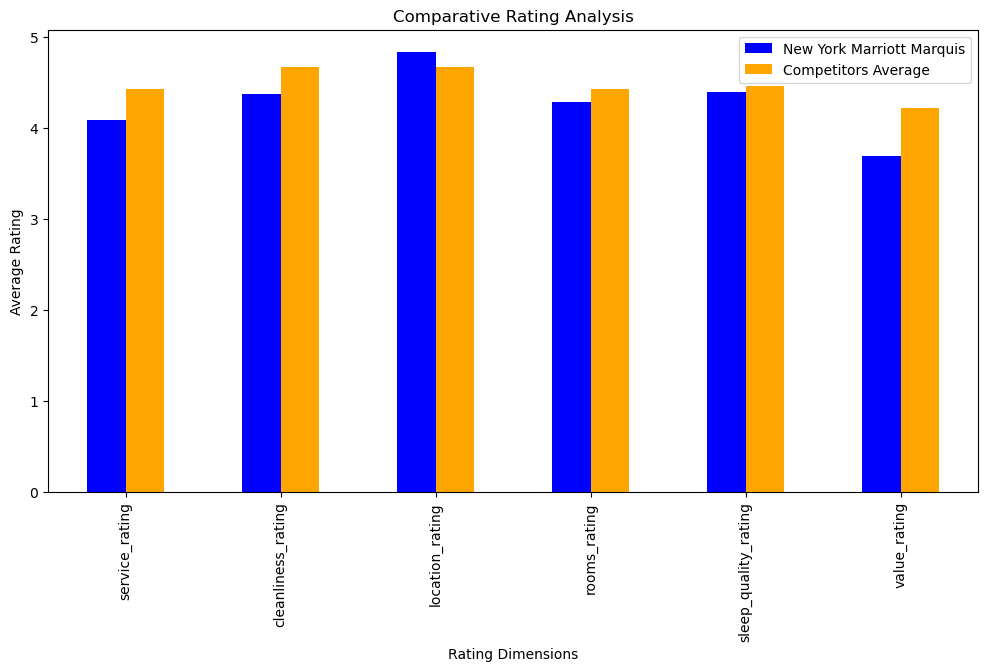

In [16]:
# Filter the dataset for 'New York Marriott Marquis' and its competitors
property_name = 'New York Marriott Marquis'
competitors = data_cleaned['name'].unique().tolist()
competitors.remove(property_name)

# Step 1: Comparative Rating Analysis
rating_columns = ['service_rating', 'cleanliness_rating', 'location_rating', 'rooms_rating', 'sleep_quality_rating', 'value_rating']

# Calculate average ratings for 'New York Marriott Marquis'
marriott_ratings = data_cleaned[data_cleaned['name'] == property_name][rating_columns].mean()

# Calculate average ratings for competitors
competitors_ratings = data_cleaned[data_cleaned['name'].isin(competitors)].groupby('name')[rating_columns].mean().mean()

# Combine the data for plotting
ratings_comparison = pd.DataFrame({
    'New York Marriott Marquis': marriott_ratings,
    'Competitors Average': competitors_ratings
})

# Plot the comparative rating analysis
ratings_comparison.plot(kind='bar', figsize=(12, 6), color=['blue', 'orange'])
plt.title('Comparative Rating Analysis')
plt.xlabel('Rating Dimensions')
plt.ylabel('Average Rating')

plt.show()

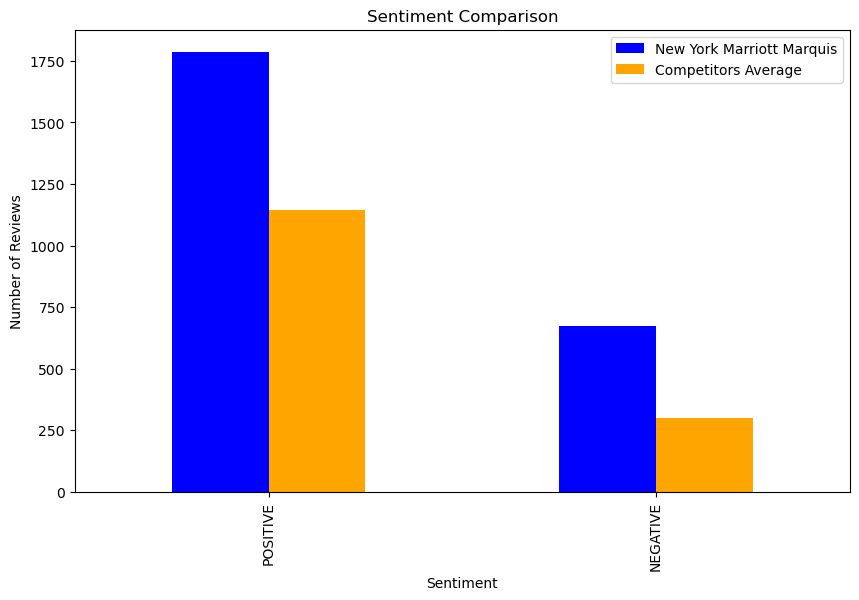

In [17]:
# Calculate sentiment distribution for 'New York Marriott Marquis'
marriott_sentiment = data_cleaned[data_cleaned['name'] == property_name]['sentiment'].value_counts()
# Calculate sentiment distribution for competitors
competitor_sentiment_counts = data_cleaned[data_cleaned['name'].isin(competitors)]['sentiment'].value_counts()
number_of_competitors = len(competitors)
competitors_sentiment = competitor_sentiment_counts / number_of_competitors

# Combine the data for plotting
sentiment_comparison = pd.DataFrame({
    'New York Marriott Marquis': marriott_sentiment,
    'Competitors Average': competitors_sentiment
}).fillna(0)

# Plot the sentiment comparison
sentiment_comparison.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title('Sentiment Comparison')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


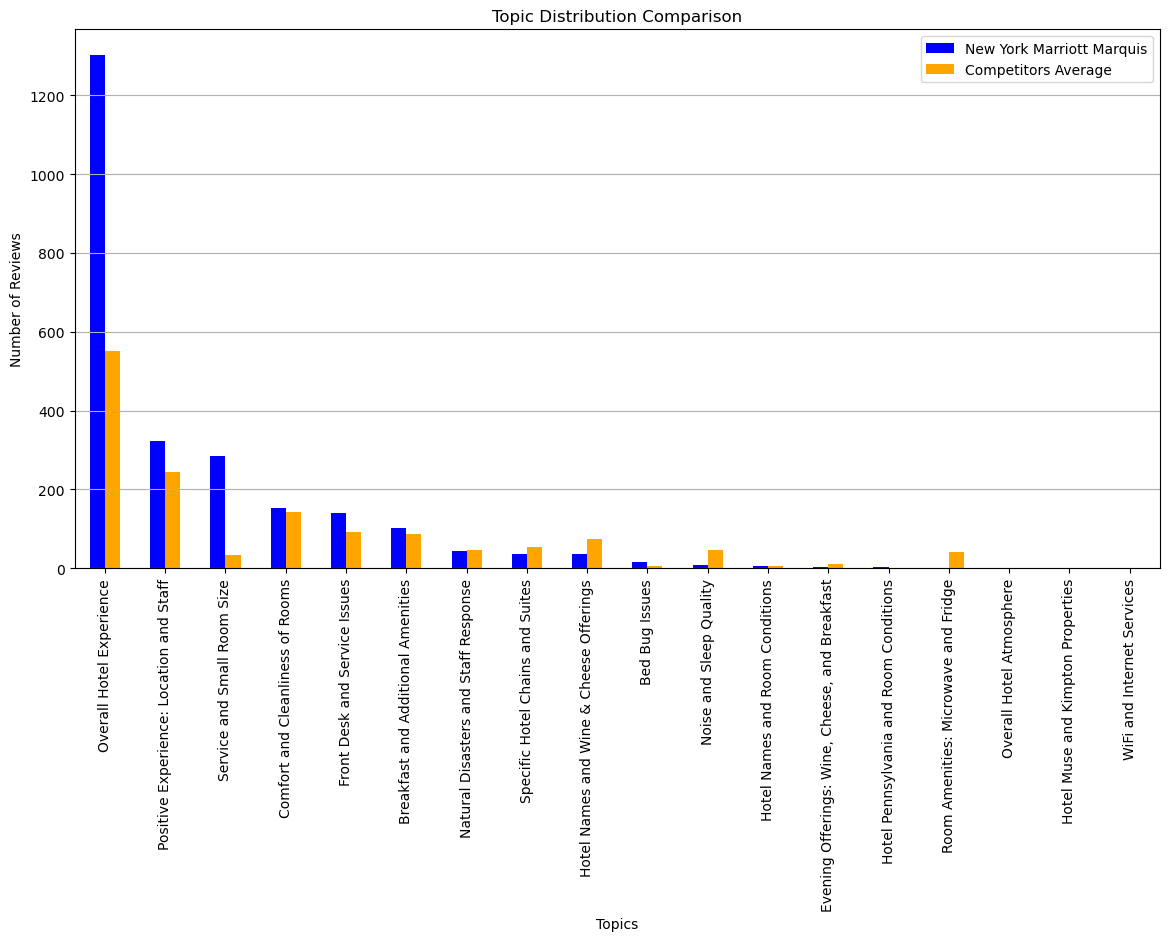

In [18]:
# Calculate topic distribution for 'New York Marriott Marquis'
marriott_topics = data_cleaned[data_cleaned['name'] == property_name]['label'].value_counts()
# Calculate topic distribution for competitors 
competitor_topic_counts = data_cleaned[data_cleaned['name'].isin(competitors)]['label'].value_counts()
competitors_topics = competitor_topic_counts / number_of_competitors

# Combine the data for plotting
topics_comparison = pd.DataFrame({
    'New York Marriott Marquis': marriott_topics,
    'Competitors Average': competitors_topics
}).fillna(0)

topics_comparison_sorted = topics_comparison.sort_values(by='New York Marriott Marquis', ascending=False)

# Plot the topic analysis
topics_comparison_sorted.plot(kind='bar', figsize=(14, 7), color=['blue', 'orange'])
plt.title('Topic Distribution Comparison')
plt.xlabel('Topics')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()


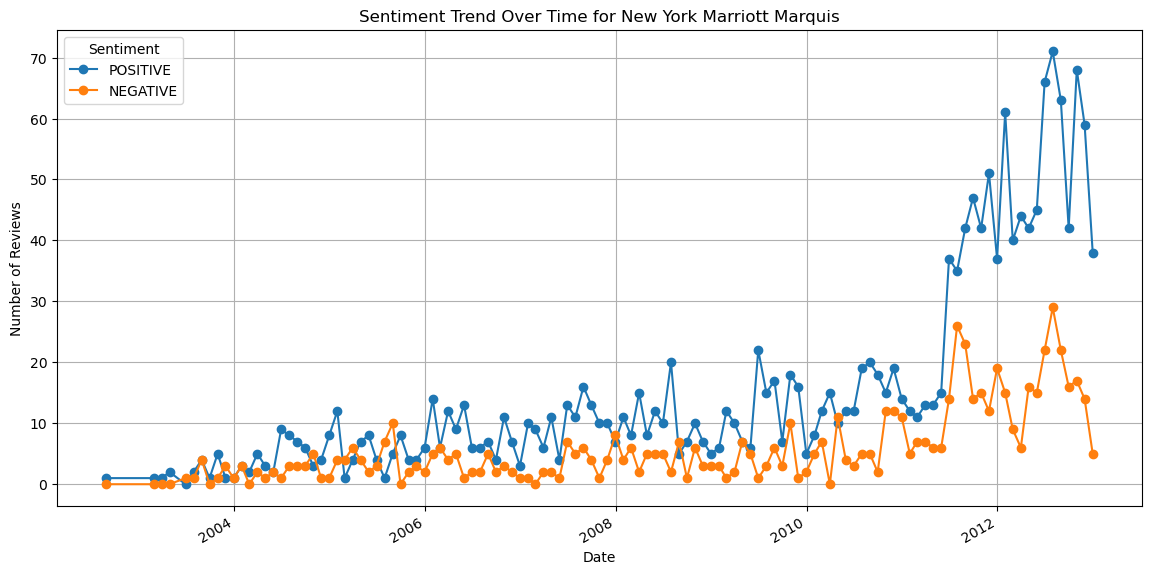

In [19]:
#Time series analysis for 'New York Marriott Marquis'
marriott_data = data_cleaned[data_cleaned['name'] == property_name]

# Sentiment trend over time for 'New York Marriott Marquis'
marriott_sentiment_trend = marriott_data.resample('ME', on='date')['sentiment'].value_counts().unstack().fillna(0)

plt.figure(figsize=(14, 7))
marriott_sentiment_trend[['POSITIVE', 'NEGATIVE']].plot(kind='line', marker='o', ax=plt.gca())
plt.title('Sentiment Trend Over Time for New York Marriott Marquis')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()

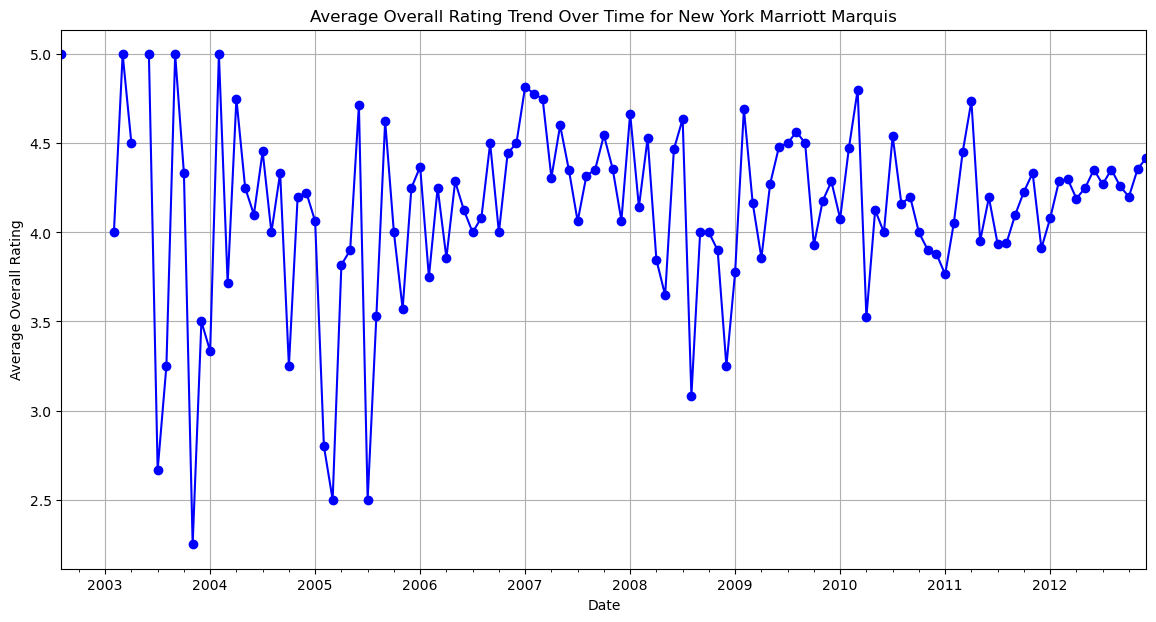

In [20]:
# Overall rating trend over time for 'New York Marriott Marquis'
marriott_rating_trend = marriott_data.resample('ME', on='date')['overall_rating'].mean()

plt.figure(figsize=(14, 7))
marriott_rating_trend.plot(kind='line', marker='o', color='blue')
plt.title('Average Overall Rating Trend Over Time for New York Marriott Marquis')
plt.xlabel('Date')
plt.ylabel('Average Overall Rating')
plt.grid(True)
plt.show()

SWOT Analysis:
Based on the visualizations and analyses, let's derive a SWOT analysis for 'New York Marriott Marquis':

Strengths:
High Ratings: Identify areas where 'New York Marriott Marquis' has high average ratings compared to competitors, such as service or cleanliness.
Positive Sentiment: If the sentiment analysis shows a higher proportion of positive reviews compared to competitors, this is a key strength.
Weaknesses:
Low Ratings: Highlight areas where 'New York Marriott Marquis' scores lower than competitors.
Negative Sentiment Trends: Periods of increased negative sentiment or lower ratings should be noted as areas needing improvement.
Opportunities:
Improvement Areas: Focus on improving areas with lower ratings or negative feedback to enhance overall guest satisfaction.
Leverage Positive Feedback: Use strengths and positive feedback in marketing and promotions to attract more guests.
Threats:
Competitor Performance: Continuous monitoring of competitor performance to ensure 'New York Marriott Marquis' stays competitive.
Negative Trends: Address any identified negative trends quickly to prevent long-term impact on the hotel's reputation.

In [ ]:
# Adjusted function to plot average ratings for each hotel
def plot_adjusted_average_ratings(data):
    # Group by hotel name and calculate mean ratings
    avg_ratings = data.groupby('name').mean(numeric_only=True)
    
    # Filter columns to be plotted
    rating_columns = ['service_rating', 'cleanliness_rating', 'overall_rating', 'location_rating', 'rooms_rating', 'sleep_quality_rating', 'value_rating']
    available_columns = [col for col in rating_columns if col in avg_ratings.columns]
    
    # Plotting each rating type
    num_plots = len(available_columns)
    fig, axes = plt.subplots((num_plots + 1) // 2, 2, figsize=(15, num_plots * 3))
    fig.suptitle('Average Ratings for Each Hotel', fontsize=16)

    axes = axes.flatten()
    
    for i, column in enumerate(available_columns):
        avg_ratings[column].plot(kind='bar', ax=axes[i])
        axes[i].set_title(column.replace('_', ' ').title())
        axes[i].set_xlabel('Hotel Name')
        axes[i].set_ylabel('Average Rating')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
# Plot the adjusted average ratings for each hotel
plot_adjusted_average_ratings(df)

In [ ]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [ ]:

# Function to plot average ratings over time for each hotel in separate figures
def plot_separate_ratings_over_time(data, freq='YS'):
    # Resample the data based on the specified frequency and calculate mean ratings
    avg_ratings_time = data.set_index('date').groupby('name').resample(freq).mean(numeric_only=True).reset_index()
    
    rating_columns = ['service_rating', 'cleanliness_rating', 'overall_rating', 'location_rating', 'rooms_rating', 'sleep_quality_rating', 'value_rating']
    
    for column in rating_columns:
        if column in avg_ratings_time.columns:
            plt.figure(figsize=(12, 6))
            for hotel in avg_ratings_time['name'].unique():
                hotel_data = avg_ratings_time[avg_ratings_time['name'] == hotel]
                plt.plot(hotel_data['date'], hotel_data[column], label=hotel)
            plt.title(f'Average {column.replace("_", " ").title()} Over Time')
            plt.xlabel('Date')
            plt.ylabel('Average Rating')
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')  # Legend outside the plot
            plt.show()

In [ ]:
plot_separate_ratings_over_time(df)

In [ ]:
df

In [ ]:
name = df['name'].unique()

In [ ]:
ax = df['overall_rating'].value_counts().sort_index().plot(kind = 'bar', title = 'Count of Reviews by Rating')
ax.set_xlabel('Review')
plt.show()